In [1]:
from keras.datasets import mnist
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from keras.callbacks import ModelCheckpoint,EarlyStopping

import matplotlib.pyplot as plt
import numpy as np
import os
import tensorflow as tf

In [2]:
seed = 42
np.random.seed(seed)
tf.random.set_seed(42)

In [3]:
# MNIST 데이터 불러오기 (train, test set 분리
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

In [4]:
# 정규화
X_train = X_train.reshape(X_train.shape[0], 28,28,1).astype('float32')/255
X_test = X_test.reshape(X_test.shape[0], 28,28,1).astype('float32')/255
# 28,28,1 : 28*28, 1 channel(흑백), 3 channel(컬러: rgb) 
# astype : 정규화 위해 실수형으로 타입 변경
# 255로 나눈 이유 : 0~1사이로 스케이링

In [5]:
# 바이너리화 (one-hot encoding)
Y_train = np_utils.to_categorical(Y_train)
Y_test = np_utils.to_categorical(Y_test)
# np 제공하는 to_categorical : one-hot encoding

In [6]:
# 모델 생성 (프레임 설정) , 컨볼루션 신경망(CNN)
model = Sequential()
model.add(Conv2D(32, kernel_size=(3,3), input_shape=(28,28,1), activation='relu'))
# 32 : mask 개수, kernel_size=(3,3), kernel(윈도우) 필터 3*3 사용, input_shape 사용에 유의
model.add(Conv2D(62, (3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=2))
# maxpooling 가장 큰 특징값(max) 추출(특성정보) pool_size=2: 크기를 1/2로 줄임
model.add(Dropout(0.25))
# dropout : 은닉층의 연결층을 무작위로(random)로 끊는다 >> 과적합 방지
model.add(Flatten())
# flatten() : 1차원 축소 (2차원 >> 1차원)
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))
# 출력결과를 1-개로 분류(0~9) 다중분류 : softmax

In [7]:
# 모델실행 환경설정
model.compile(loss='categorical_crossentropy',    # loss: c범주형 크로스 엔트로피
              optimizer='adam',                   # 최적화함수 : adam
              metrics=['accuracy'])               # 측정지표 : 정확도

In [8]:
# 모델 최적화
model_dir = './model/'  # 모델 디렉토리 생성(폴더)

if not os.path.exists(model_dir):
  os.mkdir(model_dir)

modelpath = './model/{epoch:02d}-{val_loss:.4f}.hdf5'  # 모델 저장경로 생성
checkpointer = ModelCheckpoint(filepath=modelpath, monitor='val_loss', verbose=1, save_best_only=True)
# val_loss를 monitoring 주시함. verbose : 결과 상황판, 성능이 나아진것만 출력
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=10)
# val_loss를 monitoring 주시함. 성능이 x이상 돌려서 나아지지 않으면 정지(조기종료)

In [9]:
# 모델 실행 ( 학습 : 훈련용 데이터 셋으로)

history = model.fit(X_train, Y_train, validation_data=(X_test, Y_test), epochs=30, batch_size=200, verbose=1, callbacks=[early_stopping_callback, checkpointer])

# 모델 학습 : fit, 훈련용 데이터로 설정
# 검증 데이터(validation_data : 테스트 데이터 사용)
# epochs : 반복횟수, batch_size : 샘플 200개 추출, verboss : 훈련상황 보여줌
# callbacks : 조기종료, 성능개선 여부 확인

Epoch 1/30
299/300 [============================>.] - ETA: 0s - loss: 0.2681 - accuracy: 0.9178
Epoch 1: val_loss improved from inf to 0.05735, saving model to ./model/01-0.0573.hdf5
300/300 [==============================] - 11s 29ms/step - loss: 0.2675 - accuracy: 0.9180 - val_loss: 0.0573 - val_accuracy: 0.9820
Epoch 2/30
300/300 [==============================] - ETA: 0s - loss: 0.0890 - accuracy: 0.9738
Epoch 2: val_loss improved from 0.05735 to 0.03824, saving model to ./model/02-0.0382.hdf5
300/300 [==============================] - 8s 27ms/step - loss: 0.0890 - accuracy: 0.9738 - val_loss: 0.0382 - val_accuracy: 0.9883
Epoch 3/30
298/300 [============================>.] - ETA: 0s - loss: 0.0657 - accuracy: 0.9804
Epoch 3: val_loss improved from 0.03824 to 0.03130, saving model to ./model/03-0.0313.hdf5
300/300 [==============================] - 7s 24ms/step - loss: 0.0656 - accuracy: 0.9804 - val_loss: 0.0313 - val_accuracy: 0.9887
Epoch 4/30
299/300 [==========================

In [10]:
# 테스트 정확도 출력
print('\n Test Accuracy : %.4f'%(model.evaluate(X_test, Y_test)[1]))

313/313 [==============================] - 2s 5ms/step - loss: 0.0323 - accuracy: 0.9926

 Test Accuracy : 0.9926


In [11]:
# 테스트 셋의 오차
y_vloss = history.history['val_loss']

In [12]:
# 학습용 셋의 오차
y_loss = history.history['loss']

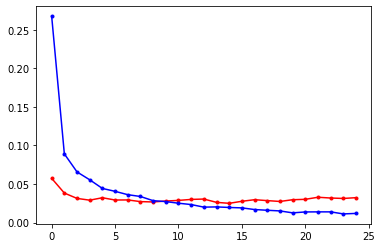

In [13]:
# 그래프로 표현
x_len=np.arange(len(y_vloss))
plt.plot(x_len, y_vloss, marker = '.', c='r', label='Testset_loss')
plt.plot(x_len, y_loss, marker = '.', c='b', label='Testset_loss')

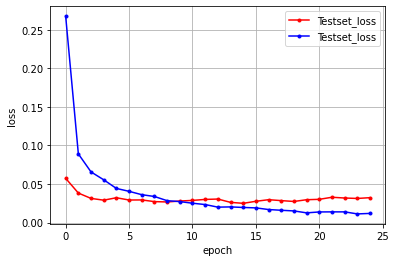

In [14]:
# 그래프로 표현
x_len=np.arange(len(y_loss))
plt.plot(x_len, y_vloss, marker = '.', c='r', label='Testset_loss')
plt.plot(x_len, y_loss, marker = '.', c='b', label='Testset_loss')

# 격자무늬 추가, 레이블 표시
plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()